In [60]:
import pandas as pd
from datetime import date, time
import zipfile
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [24]:
# ruta al archivo zip
ruta_zip = '..\\..\\datasets\\raw\\archive.zip'

#lista para almacenar los datos de los archivos csv
datos_csv = []

#abrir el archivo zip y leer los csv
with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    #recorrer cada archivo en el zip
    for nombre_archivo in zip_ref.namelist():
        #extraer archivo
        with zip_ref.open(nombre_archivo) as archivo_csv:
            #leer csv y almacenar datos en un df
            datos = pd.read_csv(archivo_csv, sep=',', encoding='utf-8')
            #agregar los datos a la lista
            datos_csv.append(datos)

#concatenar todos los df en uno solo
df_emisiones = pd.concat(datos_csv, ignore_index = True)

In [25]:
df_emisiones['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [26]:
df_emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


In [45]:
#filtramos por país 'United States' ya que solo nos sirven los registros pertenecientes a este pais
df_emisiones_usa = df_emisiones[df_emisiones['Country'] == 'United States']

#nos sirve en este caso las energías derivadas del petróleo además de las renovables
emisiones_usa = df_emisiones_usa.loc[(df_emisiones_usa['Energy_type'] == 'petroleum_n_other_liquids') | (df_emisiones_usa['Energy_type'] == 'renewables_n_other')]

In [69]:
emisiones_usa.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1323,1323,United States,petroleum_n_other_liquids,1980,34.158965,20.473758,7080.75,227119.0,343.525258,11.018764,2455.243565
1325,1325,United States,renewables_n_other,1980,5.428342,5.428342,7080.75,227119.0,343.525258,11.018764,0.000000
2709,2709,United States,petroleum_n_other_liquids,1981,31.890666,20.412303,7260.45,229416.2,331.524918,10.475547,2244.422124
2711,2711,United States,renewables_n_other,1981,5.413688,5.413688,7260.45,229416.2,331.524918,10.475547,0.000000
4095,4095,United States,petroleum_n_other_liquids,1982,30.198364,20.458149,7129.56,231608.5,315.386476,10.245540,2101.609960


In [91]:
#ver nulos del dataframe
emisiones_usa.isnull().sum()

Unnamed: 0                     0
Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
dtype: int64

## Descripcion estadistica

In [ ]:
# Energy_consumption - Amount of Consumption for the specific energy source, measured (quad Btu)
# Energy_production - Amount of Production for the specific energy source, measured (quad Btu)

In [81]:
emisiones_agrupadas_co2 = emisiones_usa.groupby(['Year', 'Energy_type'])[['Energy_consumption', 'CO2_emission']].agg(['sum', 'mean'])
emisiones_agrupadas_co2

Energy_consumption            CO2_emission  \
                                              sum       mean          sum   
Year Energy_type                                                            
1980 petroleum_n_other_liquids          34.158965  34.158965  2455.243565   
     renewables_n_other                  5.428342   5.428342     0.000000   
1981 petroleum_n_other_liquids          31.890666  31.890666  2244.422124   
     renewables_n_other                  5.413688   5.413688     0.000000   
1982 petroleum_n_other_liquids          30.198364  30.198364  2101.609960   
...                                           ...        ...          ...   
2017 renewables_n_other                 11.115512  11.115512     0.000000   
2018 petroleum_n_other_liquids          38.354617  38.354617  2342.164543   
     renewables_n_other                 11.342541  11.342541     0.000000   
2019 petroleum_n_other_liquids          38.329386  38.329386  2388.226367   
     renewables_n_other                 11.436136  11.436136     0.000000   

                                             
                                       mean  
Year Energy_type                             
1980 petroleum_n_other_liquids  2455.243565  
     renewables_n_other            0.000000  
1981 petroleum_n_other_liquids  2244.422124  
     renewables_n_other            0.000000  
1982 petroleum_n_other_liquids  2101.609960  
...                                     ...  
2017 renewables_n_other            0.000000  
2018 petroleum_n_other_liquids  2342.164543  
     renewables_n_other            0.000000  
2019 petroleum_n_other_liquids  2388.226367  
     renewables_n_other            0.000000  

[80 rows x 4 columns]

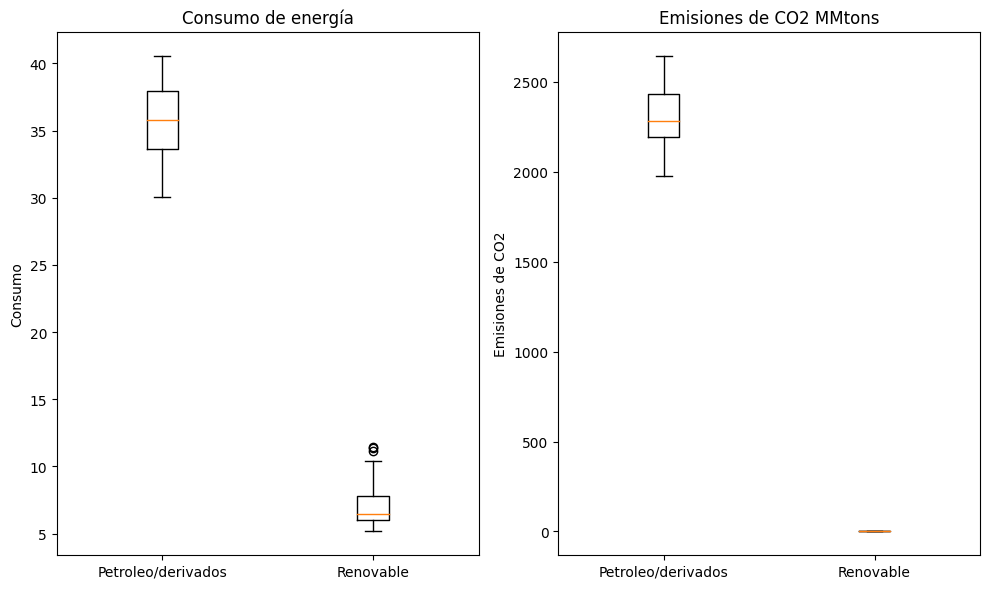

In [92]:
# Crear el gráfico de boxplot
plt.figure(figsize=(10, 6))

# Boxplot para el consumo de energía
plt.subplot(1, 2, 1)  # Subplot 1 de 2
plt.boxplot([emisiones_usa[emisiones_usa['Energy_type'] == 'petroleum_n_other_liquids']['Energy_consumption'], emisiones_usa[emisiones_usa['Energy_type'] == 'renewables_n_other']['Energy_consumption']], 
            labels=['Petroleo/derivados', 'Renovable'])
plt.title('Consumo de energía')
plt.ylabel('Consumo')

# Boxplot para las emisiones de CO2
plt.subplot(1, 2, 2)  # Subplot 2 de 2
plt.boxplot([emisiones_usa[emisiones_usa['Energy_type'] == 'petroleum_n_other_liquids']['CO2_emission'], emisiones_usa[emisiones_usa['Energy_type'] == 'renewables_n_other']['CO2_emission']], 
            labels=['Petroleo/derivados', 'Renovable'])
plt.title('Emisiones de CO2 MMtons')
plt.ylabel('Emisiones de CO2')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

## Visualizacion

<Axes: xlabel='Year', ylabel='Energy_consumption'>

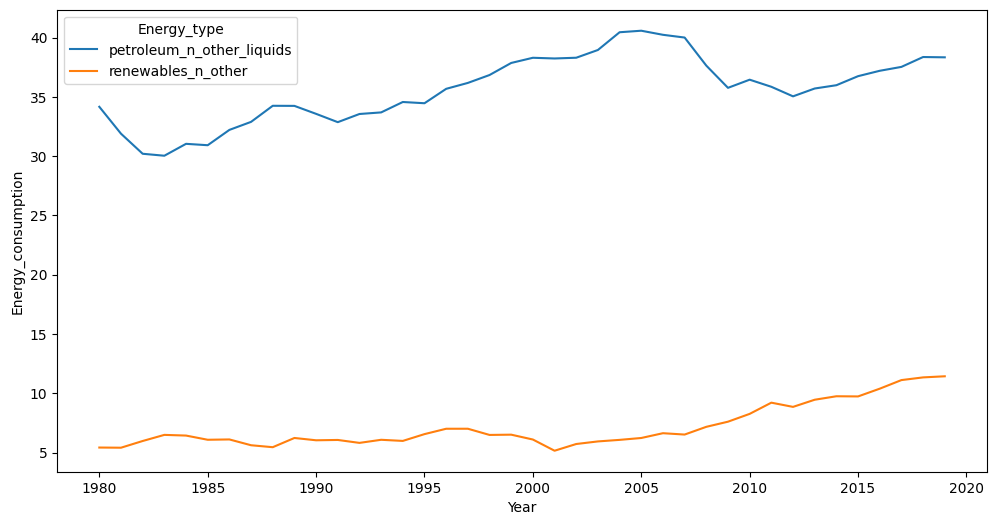

In [86]:
#CONSUMO DE ENERGIA POR TIPO 
plt.figure(figsize=(12,6))

sns.lineplot(data= emisiones_usa,x='Year', y='Energy_consumption', hue='Energy_type')

<Axes: title={'center': 'Emisiones CO2 MMtons'}, xlabel='Year', ylabel='CO2_emission'>

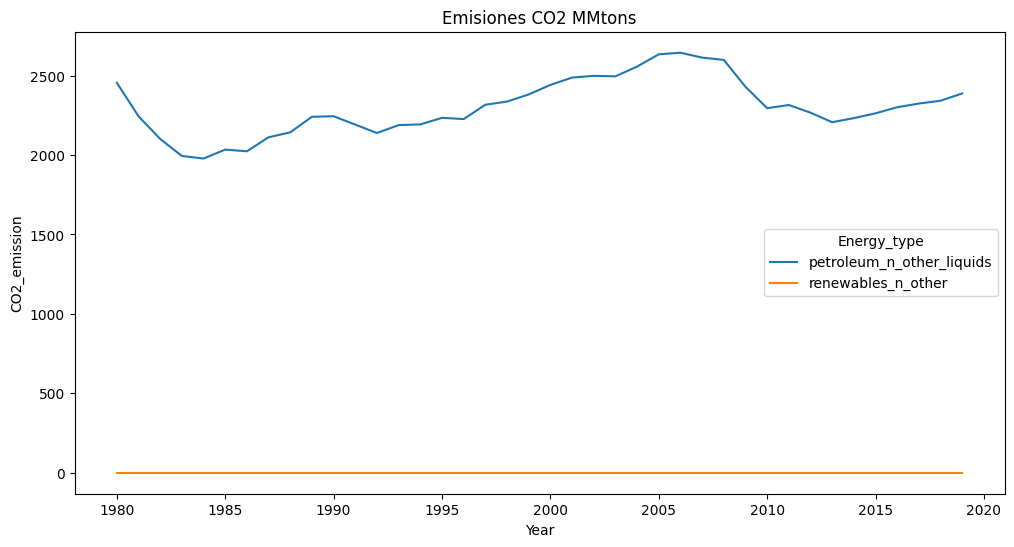

In [89]:
#EMISIONES DE CO2 POR TIPO DE ENERGIA
plt.figure(figsize=(12,6))

plt.title('Emisiones CO2 MMtons')
sns.lineplot(data= emisiones_usa,x='Year', y='CO2_emission', hue='Energy_type')

## Analisis multivariado

In [104]:
#eliminamos columnas(sin columna = sc) de los valores categoricos
emisiones_usa = emisiones_usa.drop(columns=['Unnamed: 0', 'Country'], axis = 1)
emisiones_usa

,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1323,petroleum_n_other_liquids,1980,34.158965,20.473758,7080.75,227119.0,343.525258,11.018764,2455.243565
1325,renewables_n_other,1980,5.428342,5.428342,7080.75,227119.0,343.525258,11.018764,0.000000
2709,petroleum_n_other_liquids,1981,31.890666,20.412303,7260.45,229416.2,331.524918,10.475547,2244.422124
2711,renewables_n_other,1981,5.413688,5.413688,7260.45,229416.2,331.524918,10.475547,0.000000
4095,petroleum_n_other_liquids,1982,30.198364,20.458149,7129.56,231608.5,315.386476,10.245540,2101.609960
...,...,...,...,...,...,...,...,...,...
52607,renewables_n_other,2017,11.115512,11.236626,18927.11,326379.8,299.141489,5.158407,0.000000
53991,petroleum_n_other_liquids,2018,38.354617,28.512675,19479.58,328317.2,308.248891,5.195359,2342.164543
53993,renewables_n_other,2018,11.342541,11.552175,19479.58,328317.2,308.248891,5.195359,0.000000
55377,petroleum_n_other_liquids,2019,38.329386,31.910982,19925.43,330043.8,304.305271,5.040497,2388.226367


In [105]:
emisiones_usa_dummy = pd.get_dummies(emisiones_usa, columns=['Energy_type'])
emisiones_usa_dummy.head()

,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_type_petroleum_n_other_liquids,Energy_type_renewables_n_other
1323,1980,34.158965,20.473758,7080.75,227119.0,343.525258,11.018764,2455.243565,True,False
1325,1980,5.428342,5.428342,7080.75,227119.0,343.525258,11.018764,0.000000,False,True
2709,1981,31.890666,20.412303,7260.45,229416.2,331.524918,10.475547,2244.422124,True,False
2711,1981,5.413688,5.413688,7260.45,229416.2,331.524918,10.475547,0.000000,False,True
4095,1982,30.198364,20.458149,7129.56,231608.5,315.386476,10.245540,2101.609960,True,False


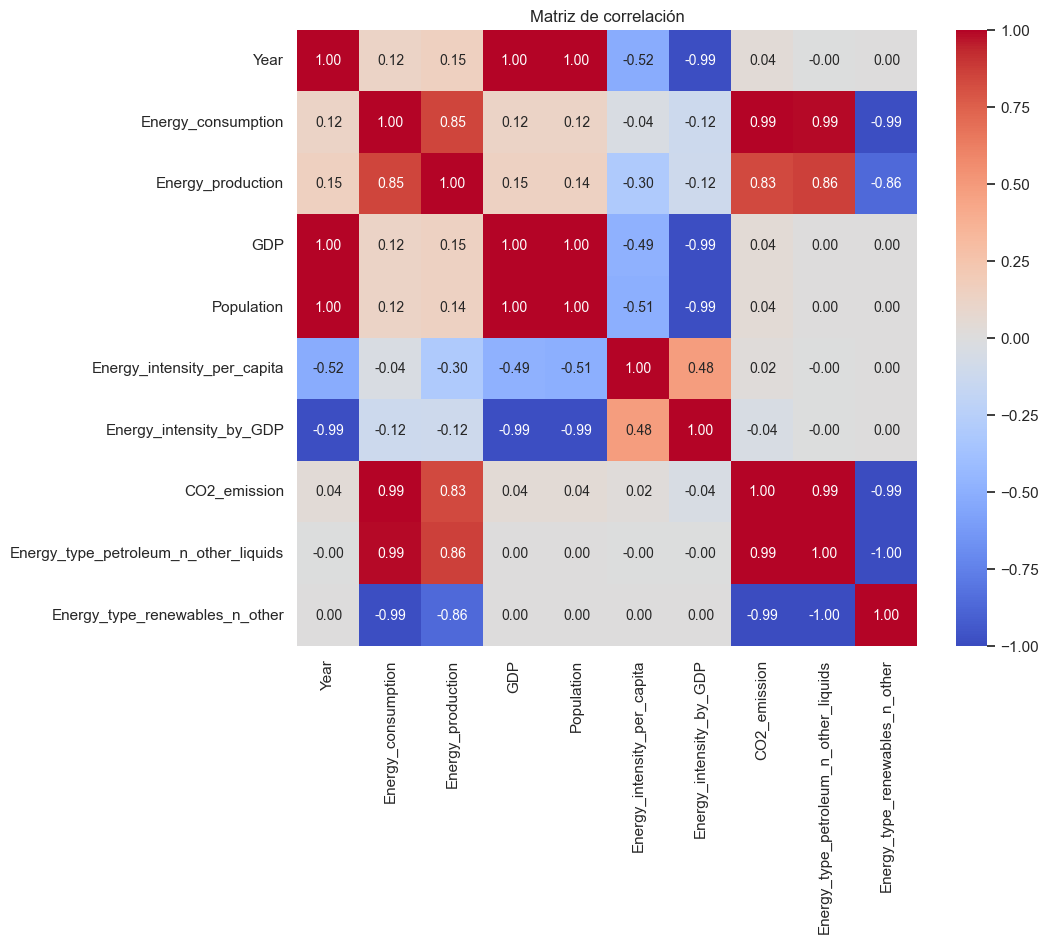

In [106]:
# Calcula la matriz de correlación
matriz_correlacion = emisiones_usa_dummy.corr()

# Visualiza la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de correlación')
plt.show()